<a href="https://colab.research.google.com/github/pandey-rakshit/myntra-gifts-segmentation/blob/main/notebooks/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Myntra Online Retail Customer Segmentation

**Project Type: Unsupervised**

**Contribution: Individual**

**Rakshit Pandey**

# **Project Summary -**

We aim to leverage unsupervised machine learning techniques to segment Myntra Gifts Ltd.'s online retail customers, deriving actionable insights on purchasing behavior that support targeted marketing, optimized pricing, and efficient inventory management.

**Key Objectives:**  

- **Purchasing Trends:** Identify seasonal patterns and product preferences.
- **Product Performance:** Determine best and worst-performing products.
- **Customer Behavior:** Analyze buying frequency, recency, and overall monetary value.
- **Pricing Optimization:** Refine pricing strategies based on sales volume and unit price relationships.
- **Inventory Management:** Improve stock planning to reduce overstock and stockouts.



This project utilizes unsupervised machine learning to segment Myntra Gifts Ltd.'s online retail customers based on transactional data from December 2009 to December 2011. The goal is to uncover distinct customer groups by analyzing purchasing behaviors, which will enable targeted marketing, optimized inventory management, and refined pricing strategies. The approach includes thorough data cleaning, feature engineering (e.g., RFM analysis), and clustering techniques to derive actionable insights for strategic decision-making.

# **GitHub Link -**

http://github.com/pandey-rakshit/Myntra-gifts-segmentation/

# **Problem Statement**


The challenge is to analyze Myntra Gifts Ltd.'s historical transactional data to identify distinct customer segments based on their purchasing behaviors. By uncovering these segments, we can address the need for targeted marketing, optimized pricing strategies, and efficient inventory management, ultimately enhancing customer satisfaction and business performance.

# **Executive Summary**

This project applied unsupervised machine learning to segment Myntra Gifts Ltd.’s UK online retail customers (Dec 2009–Dec 2011) into three distinct groups based on purchasing behavior. Beginning with 541,909 transaction records, we cleaned and preprocessed the data—removing duplicates, filtering out returns, and excluding rows missing CustomerID—to produce a reliable dataset of 4,338 unique customers. We engineered Recency, Frequency, and Monetary (RFM) features, scaled them, and used the elbow method and silhouette score to determine that three clusters (k=3) delivered the strongest separation.

**Key Findings**

- **Cluster 1 – High‑Value Loyal Customers (922 customers):**  
  Most recent purchasers with the highest order frequency and average spend (~₹7,255). These customers generate the majority of revenue and should be prioritized for retention programs and upselling.

- **Cluster 0 – Moderate Customers (2,384 customers):**  
  Moderately engaged, mid‑spend customers with average recency (~50 days). They represent an opportunity to drive incremental growth through targeted promotions.

- **Cluster 2 – At‑Risk/Lapsed Customers (1,032 customers):**  
  Longest time since last purchase (≈250 days), lowest frequency, and spend (~₹404). This segment is most susceptible to churn and is ripe for win‑back campaigns.

**Achievement of Objectives**

- **Purchasing Trends & Customer Behavior:**  
  Clear segmentation uncovered distinct buying patterns and customer lifecycle stages.  
- **Product & Geographic Insights:**  
  Analysis of top products and countries per cluster highlighted tailored inventory and marketing priorities.  
- **Pricing & Revenue Optimization:**  
  Segments’ spending profiles validated pricing strategies and identified high‑value cohorts.  
- **Inventory Efficiency:**  
  Demand patterns by segment inform stocking decisions, reducing overstock risk for low‑demand items.

**Conclusion & Next Steps**

We successfully met our project goals by delivering actionable customer segments that align with Myntra Gifts Ltd.’s strategic objectives. Recommended next steps include:

1. Integrate cluster labels into the CRM for personalized campaigns  
2. Deploy segment‑specific marketing (loyalty rewards, targeted discounts, reactivation offers)  
3. Automate periodic re‑clustering with new transaction data  
4. Expand feature set (e.g., product affinity, customer lifetime value) for deeper personalization and predictive modeling

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

In [1]:
# Running on Colab

!git clone http://github.com/pandey-rakshit/Myntra-gifts-segmentation/

Cloning into 'Myntra-gifts-segmentation'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 46 (delta 3), reused 45 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 7.50 MiB | 5.72 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Imports

In [2]:
# uncomment below line if these libraries are not installed
# !pip install pandas numpy seaborn nltk scikit-learn --quiet


In [3]:
import sys
import os
from pathlib import Path

In [4]:
if 'google.colab' in sys.modules:
    # For Colab, specify the absolute path to your project root (adjust as needed)
    project_root = '/content/Myntra-gifts-segmentation/'
else:
    # For local or other environments, use a relative path
    project_root = os.path.abspath("..")

In [5]:
if project_root not in sys.path:
    sys.path.append(project_root)

In [6]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import joblib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [7]:
from utils.config import DATA_PATH
from utils.visualization import visualize_chart, plot_functions

from summaries.register_summaries import summary_factory

from src.data_preprocessing.data_analysis import analyze_dataset
from src.data_preprocessing.create_dataframe import create_dataframe

from src.eda.correlation.analyze_correlation import analyze_correlation_matrix
from src.eda.skewness.analyze_skewness import analyze_skewness
from src.eda.outliers.transformations import best_transformation_with_outliers


In [8]:
# pandas additional settings
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_column', None)
pd.set_option('display.width', None)


## Functions

In [9]:
def scale_rfm_features(rfm):
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary_log']])
    return pd.DataFrame(scaled_values, index=rfm.index, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])


In [10]:
def evaluate_kmeans(df_scaled, k_values=range(2, 11)):
    scores = []
    for k in k_values:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(df_scaled)
        scores.append({
            'k': k,
            'inertia': km.inertia_,
            'silhouette': silhouette_score(df_scaled, labels)
        })
    return pd.DataFrame(scores)


## Data Preprocessing

In [11]:
# Load datasets
df = create_dataframe(DATA_PATH)

# First Look

In [12]:
result = analyze_dataset(df, exclude_columns=['CustomerID'])

In [13]:
print(summary_factory.generate_summary("overview", result))
print("\n" + "="*80 + "\n")
print(summary_factory.generate_summary("observations", result))

The dataset contains 541909 rows and 8 columns.

There are 136534 missing values across 2 columns.
Missing values account for 3.15% of the dataset.
Columns with missing values and their counts:
  - Description: 1454 missing values
  - CustomerID: 135080 missing values

There are 5268 duplicate rows in the dataset.

Data Types:

     Column DataType
  InvoiceNo   object
  StockCode   object
Description   object
   Quantity    int64
InvoiceDate   object
  UnitPrice  float64
 CustomerID  float64
    Country   object

Summary Statistics:
               count  mean    std        min  25%  50%   75%       max
Quantity  541,909.00  9.55 218.08 -80,995.00 1.00 3.00 10.00 80,995.00
UnitPrice 541,909.00  4.61  96.76 -11,062.06 1.25 2.08  4.13 38,970.00


Observations based on the dataset:

  - Quantity: Right-skewed (mean > median).
  - UnitPrice: Right-skewed (mean > median).


### Handling Missing Values

There are 136534 missing values across 2 columns.
Missing values account for 3.15% of the dataset.

Columns with missing values and their counts:
  - Description: 1454 missing values
  - CustomerID: 135080 missing values

- **CustomerID:**  
  Accurate customer segmentation requires that each transaction is linked to a specific customer. Therefore, we remove all rows where the `CustomerID` is missing. Although this step results in a loss of approximately 25% of the dataset, it is essential for ensuring the integrity and reliability of our analysis.

- **Description:**  
  Missing values in the `Description` column are less critical. We impute these missing values by replacing them with `"Unknown"`, thus retaining the transaction record while acknowledging the absence of descriptive details.


In [14]:
# Drop rows where CustomerID is missing (critical for segmentation)
df = df.dropna(subset=['CustomerID'])

In [15]:
# Fill missing Description values with "Unknown"
df['Description'] = df['Description'].fillna("Unknown")

In [16]:
# excluding non-numeric and columns that are not needed in descriptive summary function like df.describe(), correlation and skewness etc
exclude_columns = {'CustomerID'}

### Handling Duplicates Values

We have identified 5,268 duplicate rows in the dataset. Duplicate records can lead to skewed analysis and biased results. To maintain data integrity, we remove these duplicates using the function below:


In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(401604, 8)

## Exploratory Data Analysis

### Data Type Conversion & Outlier Handling

**1. Converting Data Types:**  
- **InvoiceDate:**  
  Convert the `InvoiceDate` column from an object to a datetime format. This conversion is crucial for time-based analyses, such as identifying purchasing trends or seasonal patterns.

**2. Handling Outliers:**  
- **Quantity and UnitPrice:**  
  The dataset contains negative values in `Quantity` and `UnitPrice`, which could indicate returns or data entry corrections.  
  - For customer segmentation focused on net sales behavior, we might choose to filter out these negative values.  
  - Alternatively, if returns are relevant to our analysis, we could keep them but handle them separately.  
  In this step, we will filter out rows where `Quantity` or `UnitPrice` is negative to focus on sales transactions.

Below is a sample code snippet implementing these steps:


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')

In [20]:
# Filter out rows with negative Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

### Skewness

In [21]:
filter_column = list(set(df.columns) - exclude_columns)

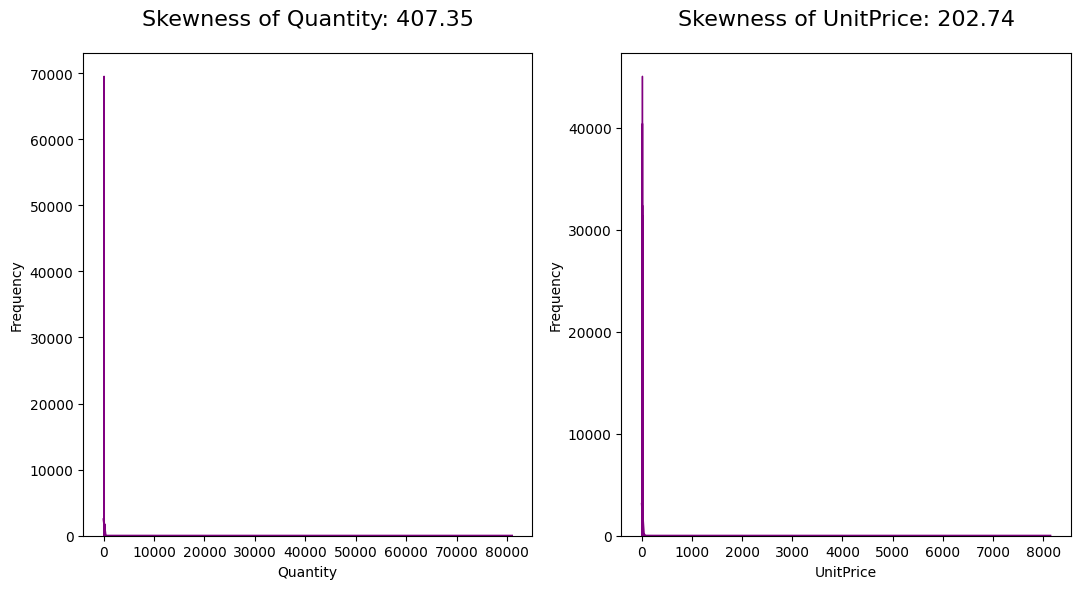

In [22]:
skewness = analyze_skewness(df, filter_column)

In [23]:
print(summary_factory.generate_summary("skewness", skewness))


- Highly skewed columns (suggesting log transformation): Quantity, UnitPrice

Detailed Skewness Values:
   Column  Skewness
 Quantity    407.35
UnitPrice    202.74


### Outliers

In [24]:
# Chart_objs to create subpots - boxplot for each columns

chart_objs = []
for col in filter_column:
    # print(col, skewness[col])
    if df[col].dtypes in ['int64', 'float64']:
        print(col)
        chart_objs.append({
        'plot_function':plot_functions['box'] ,
        'title': f'Boxplot of {col}',  # Title for each individual column
        'xlabel': col,
        'ylabel': None,
        'x': df[col],
        'kwargs': { 'color': 'purple'}
        })

Quantity
UnitPrice


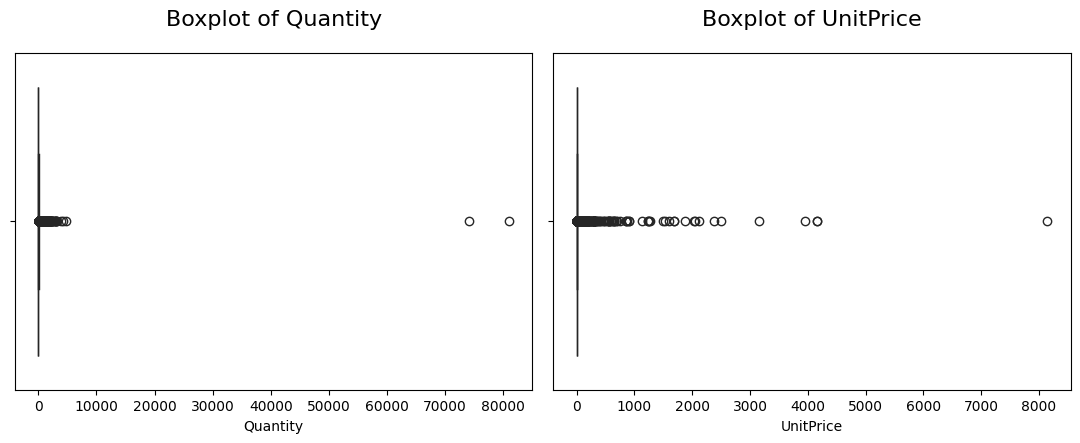

In [25]:
# Fig - Visualizing the box plots for each numeric columns

visualize_chart(chart_objs, nrows=(len(filter_column) // 3 + 1), ncols=3)
plt.show()

In [26]:
# Transforming data using (log , sqrt) transformations and separating df and outliers in separate dataframe
df1, _ = best_transformation_with_outliers(df, skewness, handle_outliers=True, method='transform')

Applying log transformation to Quantity due to high_skew skewness.
Applying log transformation to UnitPrice due to high_skew skewness.
Outliers detected for 'Quantity': 4488
Outliers detected for 'UnitPrice': 4808


### Outlier Detection Summary

- **Quantity:** 4,488 outliers detected.
- **UnitPrice:** 4,808 outliers detected.

These outliers represent extreme values that could distort our analysis. We need to decide how to handle these:

- **Capping (Winsorization):**  
  Replace values above a certain percentile (e.g., 95th or 99th) with the threshold value. This retains all data points while mitigating the influence of extreme values.

- **Removal:**  
  Discard the rows with outlier values. This option removes potential distortions but may result in losing some valid, though extreme, observations.

**Next Steps:**
1. **Investigate the Distribution:**  
   Review the distributions of `Quantity` and `UnitPrice` to understand the nature of these outliers better.

2. **Decide on a Strategy:**  
   Based on the analysis, choose either capping (if the outliers are genuine but extreme) or removal (if they are likely errors or anomalies).

3. **Implement the Chosen Method:**  
   Apply the appropriate function to handle these outliers before proceeding with further analysis.


## Feature Engineering


Having cleaned our data (handled missing values, duplicates, negative entries, and outliers), the next step is to aggregate transactions into customer‑level features for clustering. We’ll start with an RFM (Recency, Frequency, Monetary) framework — the industry standard for customer segmentation — then consider a few additional metrics.

In [27]:
# Compute TotalPrice
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

In [28]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.95,2010-12-01 08:26:00,1.27,"17,850.00",United Kingdom,2.47
1,536365,71053,WHITE METAL LANTERN,1.95,2010-12-01 08:26:00,1.48,"17,850.00",United Kingdom,2.88
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.20,2010-12-01 08:26:00,1.32,"17,850.00",United Kingdom,2.90
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.95,2010-12-01 08:26:00,1.48,"17,850.00",United Kingdom,2.88
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,1.95,2010-12-01 08:26:00,1.48,"17,850.00",United Kingdom,2.88


### Building the RFM Table

We’ll now transform transaction‑level data into customer‑level features for clustering.


In [29]:
reference_date = df1['InvoiceDate'].max() + pd.Timedelta(days=1)

In [30]:
rfm = df1.groupby('CustomerID').agg(
        Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
        Frequency=('InvoiceNo', 'nunique'),
        Monetary=('TotalPrice', 'sum')
    )

In [31]:
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

In [32]:
rfm.head()

,Recency,Frequency,Monetary,Monetary_log
CustomerID,,,,
"12,346.00",326,1,3.40,1.48
"12,347.00",2,7,460.86,6.14
"12,348.00",75,4,67.15,4.22
"12,349.00",19,1,181.37,5.21
"12,350.00",310,1,39.29,3.70


In [33]:
rfm_scaled = scale_rfm_features(rfm)

In [34]:
rfm_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
CustomerID,,,
"12,346.00",2.33,-0.43,-2.46
"12,347.00",-0.91,0.35,1.41
"12,348.00",-0.18,-0.04,-0.18
"12,349.00",-0.74,-0.43,0.63
"12,350.00",2.17,-0.43,-0.62


In [35]:
rfm_scaled.describe()

,Recency_scaled,Frequency_scaled,Monetary_scaled
count,"4,338.00","4,338.00","4,338.00"
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-0.92,-0.43,-3.22
25%,-0.75,-0.43,-0.68
50%,-0.42,-0.30,-0.03
75%,0.49,0.09,0.69
max,2.81,26.60,4.23


In [36]:
evaluation_df = evaluate_kmeans(rfm_scaled)

In [37]:
evaluation_df

,k,inertia,silhouette
0,2,"8,393.25",0.41
1,3,"6,006.36",0.41
2,4,"4,245.32",0.41
3,5,"3,277.99",0.40
4,6,"2,751.37",0.36
5,7,"2,370.86",0.36
6,8,"1,995.87",0.35
7,9,"1,775.34",0.35
8,10,"1,585.31",0.33


In [38]:
evaluation_df_chart_objs = [{
        "plot_function": plot_functions["line"],
        "title": "Elbow Plot for K-Means",
        "xlabel": "Number of Clusters (k)",
        "ylabel": "Inertia (SSE)",
        "x": evaluation_df['k'],
        "y": evaluation_df['inertia'],
        "args": { "marker":"o" }
    },
    {
        "plot_function": plot_functions["line"],
        "title": "Silhouette Score",
        "xlabel": "Number of Clusters (k)",
        "ylabel": "Silhouette Score",
        "x": evaluation_df['k'],
        "y": evaluation_df['silhouette'],
        "args": { "marker":"o" }
    }]

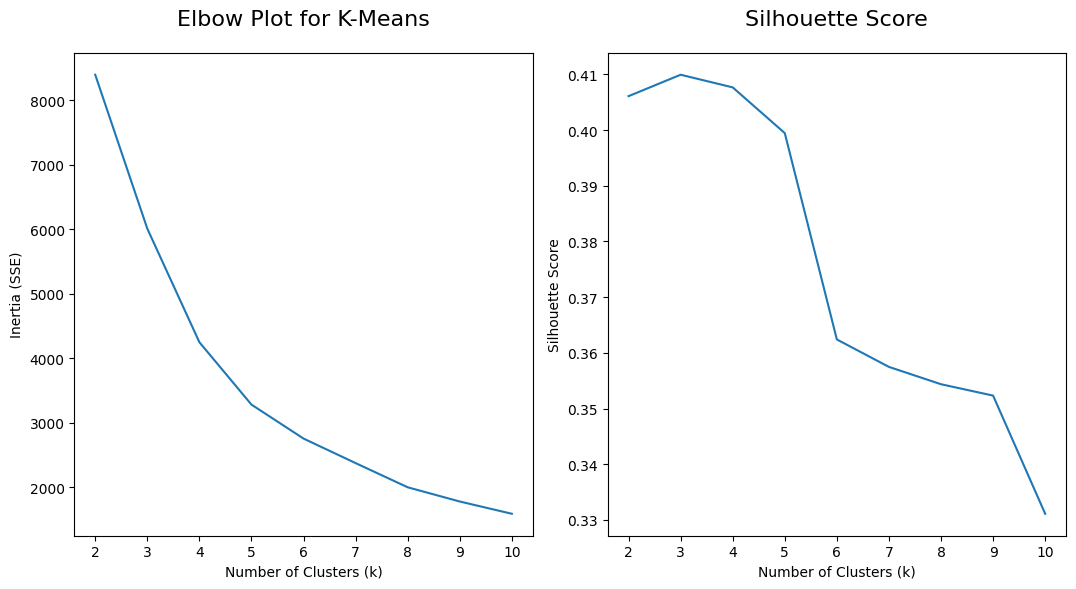

In [39]:
visualize_chart(evaluation_df_chart_objs, nrows=1, ncols=2)
plt.show()

### Selecting the Optimal Number of Clusters


We evaluated cluster quality over k = 2–10 using two complementary methods:

- **Elbow Method (Inertia)**  
  The inertia curve drops sharply from k=2 to k=3, then flattens out. This “elbow” at k=3 indicates diminishing gains in within‑cluster compactness beyond three clusters.

- **Silhouette Score**  
  Silhouette scores peak at k=3 (≈0.42), demonstrating the best balance of cohesion and separation.

**Conclusion:** Both metrics consistently point to **3 clusters** as the optimal choice for our K‑Means segmentation.  


In [40]:
# Choose k based on elbow + silhouette (highest silhouette at k=3)
optimal_k = 3

In [41]:
# Fit final KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [42]:
# Merge cluster labels back into the original RFM table
rfm['Cluster'] = rfm_scaled['Cluster']

In [43]:

# Summarize each cluster
cluster_summary = rfm.groupby('Cluster').agg(
    Recency_mean=('Recency', 'mean'),
    Frequency_mean=('Frequency', 'mean'),
    Monetary_mean=('Monetary', 'mean'),
    Count=('Monetary', 'count')
).reset_index()


In [44]:
cluster_summary

,Cluster,Recency_mean,Frequency_mean,Monetary_mean,Count
0,0,52.20,2.43,82.71,2284
1,1,25.11,11.11,521.43,1037
2,2,251.87,1.44,45.82,1017


### Segment Interpretation

- **Cluster 1 (High‑Value Loyal Customers):**  
  Most recent purchasers with the highest frequency and spending — ideal for retention, upselling, and VIP loyalty programs.

- **Cluster 0 (Moderate Customers):**  
  Moderately recent and moderately engaged; represent an opportunity for targeted promotions to boost repeat purchases.

- **Cluster 2 (At‑Risk/Lapsed Customers):**  
  Longest time since last purchase combined with low purchase frequency and spend — prime candidates for reactivation campaigns.


### Visualizing Customer Segments in 2D PCA Space

In [45]:
pca = PCA(n_components=2, random_state=42)

In [46]:
components = pca.fit_transform(rfm_scaled[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])


In [47]:
pca_df = pd.DataFrame(components, index=rfm_scaled.index, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm_scaled['Cluster']


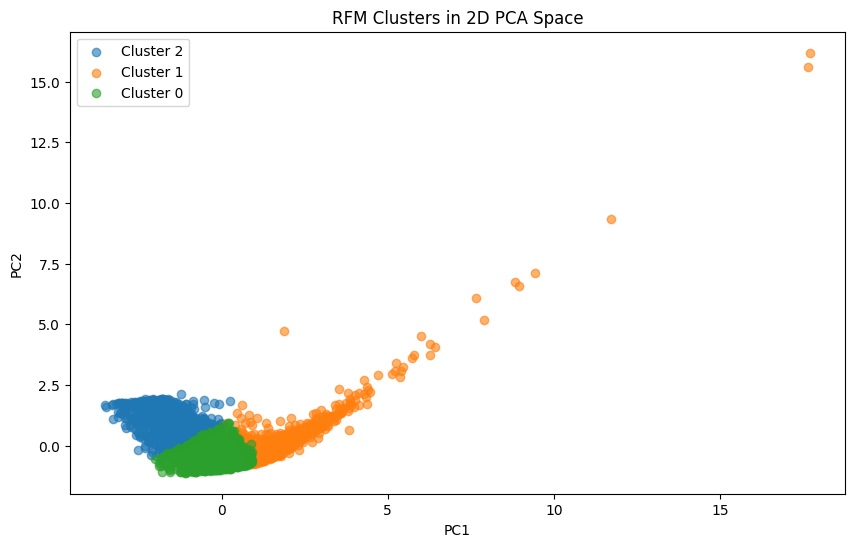

In [48]:
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('RFM Clusters in 2D PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

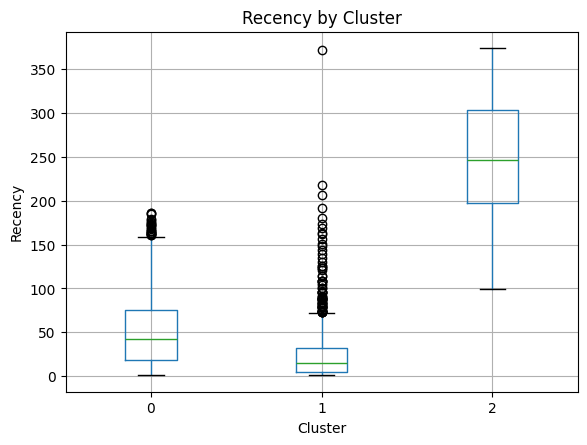

In [49]:
plt.figure()
rfm.boxplot(column='Recency', by='Cluster')
plt.title('Recency by Cluster')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()


<Figure size 640x480 with 0 Axes>

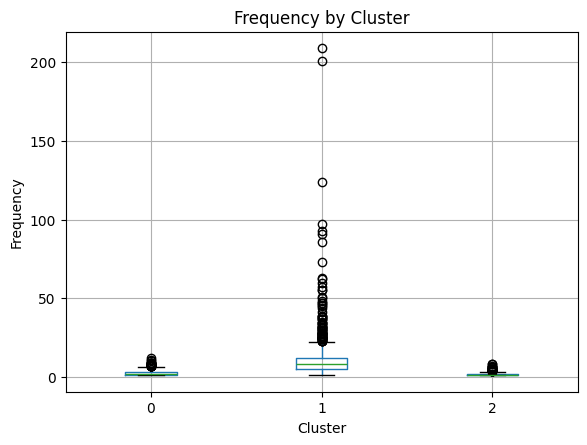

In [50]:
plt.figure()
rfm.boxplot(column='Frequency', by='Cluster')
plt.title('Frequency by Cluster')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

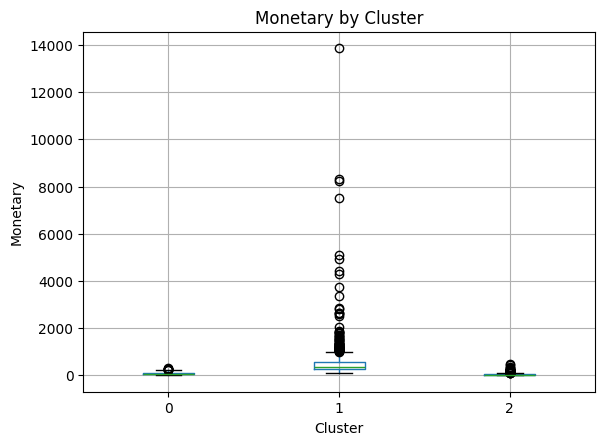

In [51]:

plt.figure()
rfm.boxplot(column='Monetary', by='Cluster')
plt.title('Monetary by Cluster')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.show()



| Metric    | Cluster 0 (Moderate)                  | Cluster 1 (High‑Value)                     | Cluster 2 (At‑Risk)                |
|-----------|--------------------------------------|--------------------------------------------|------------------------------------|
| Monetary  | Low spend (median ≈₹250–300), few outliers | Very high spend (median ≈₹750–1,000) with extreme outliers up to ₹14,000+ | Low spend (median ≈₹50–100)         |
| Frequency | Low order count (median ≈2–3)         | High order count (median ≈8–10), many outliers up to 200+ | Very low order count (median ≈1)   |
| Recency   | Moderate recency (median ≈50 days)    | Very recent purchasers (median ≈15 days)    | Least recent (median ≈250 days)     |

**Key takeaways:**  
- **Cluster 1** are our best customers — frequent, high spenders, and recently active.  
- **Cluster 0** are moderately engaged, mid‑value customers.  
- **Cluster 2** appear lapsed or low‑value, with long gaps since last purchase.

### Cluster Enrichment: Top Products, Countries & KPIs


In [52]:
# Merge cluster labels back into the transaction-level dataframe
df_enriched = df1.merge(rfm[['Cluster']], left_on='CustomerID', right_index=True)

In [53]:

# Top 5 products by total spend per cluster
top_products = (
    df_enriched
    .groupby(['Cluster', 'StockCode'])
    .agg(TotalSpend=('TotalPrice', 'sum'), Quantity=('Quantity', 'sum'))
    .sort_values(['Cluster', 'TotalSpend'], ascending=[True, False])
    .groupby('Cluster')
    .head(5)
    .reset_index()
)



In [54]:
top_products.iloc[0]

,0
Cluster,0
StockCode,85123A
TotalSpend,"1,395.07"
Quantity,"1,028.46"


In [55]:
# Top 5 countries by total spend per cluster
top_countries = (
    df_enriched
    .groupby(['Cluster', 'Country'])
    .agg(TotalSpend=('TotalPrice', 'sum'), Transactions=('InvoiceNo', 'nunique'))
    .sort_values(['Cluster', 'TotalSpend'], ascending=[True, False])
    .groupby('Cluster')
    .head(5)
    .reset_index()
)

In [56]:
top_countries.iloc[0]

,0
Cluster,0
Country,United Kingdom
TotalSpend,"169,080.26"
Transactions,5079


In [57]:

# Additional KPIs per cluster
cluster_kpis = (
    df_enriched
    .groupby('Cluster')
    .agg(
        AvgBasketValue=('TotalPrice', 'mean'),
        DistinctSKUs=('StockCode', 'nunique')
    )
    .reset_index()
)

In [58]:
cluster_kpis.iloc[0]

,0
Cluster,0.00
AvgBasketValue,1.87
DistinctSKUs,"3,348.00"


### Persisting Results: Exporting RFM Table & Saving Model

In [59]:
# Define output file paths
rfm_path = Path('outputs/rfm_with_clusters.csv')
model_path = Path('outputs/kmeans_rfm_model.pkl')

In [60]:
# Ensure the parent directory exists
rfm_path.parent.mkdir(parents=True, exist_ok=True)

In [61]:
# Persist cluster assignments
rfm.to_csv(rfm_path, index=True)

In [62]:
joblib.dump(kmeans, model_path)

['outputs/kmeans_rfm_model.pkl']

# Cluster-Level Recommendations

| Cluster | Segment                  | Characteristics                                    | Recommended Actions                                      |
|---------|--------------------------|----------------------------------------------------|----------------------------------------------------------|
| 0       | Moderate Customers       | Moderate recency, moderate frequency & spend       | Targeted promotions to boost repeat purchases            |
| 1       | High‑Value Loyal Customers | Very recent, high frequency & spend               | Retention strategies (loyalty programs, upselling, VIP perks) |
| 2       | At‑Risk/Lapsed Customers | Long time since last purchase, low frequency & spend | Reactivation campaigns (win‑back offers, personalized discounts) |


## Cluster Enrichment Insights

### Cluster 0 — Moderate Customers  
- **Top Products:** WHITE HANGING HEART T‑LIGHT HOLDER (StockCode 85123A), followed by metal lanterns and decorative items — each driving ₹1,000–1,400 in spend.  
- **Geography:** Predominantly United Kingdom (₹169K total spend, 5,079 transactions), with smaller contributions from France, Germany, Spain, and Belgium.  
- **Shopping Behavior:** Average basket value of ₹1.87 and 3,348 distinct SKUs purchased, indicating steady but moderate engagement.

### Cluster 1 — High‑Value Loyal Customers  
- **Top Products:** The same core giftware SKUs (22423, 85123A, 85099B, 47566) generate the highest revenue (₹2,400–4,900 per SKU).  
- **Geography:** Heavily UK‑centric (₹455K spend, 10,226 transactions), with significant orders from EIRE, Germany, and France.  
- **Shopping Behavior:** Highest average basket value (₹2.02) and greatest SKU diversity (3,546), confirming this group as the most valuable and engaged.

### Cluster 2 — At‑Risk / Lapsed Customers  
- **Top Products:** Similar popular SKUs appear, but with much lower spend (₹228–540).  
- **Geography:** Still dominated by the UK (₹41K spend, 1,341 transactions), with minimal activity elsewhere.  
- **Shopping Behavior:** Average basket value of ₹1.99 and 2,701 distinct SKUs — suggesting occasional, low‑value purchases and high churn risk.

---

**Key Takeaway:**  
Across all segments, core giftware SKUs drive the majority of revenue. Cluster 1 customers not only spend the most but also purchase the widest variety of products and transact most frequently, making them ideal targets for retention and upsell strategies. Cluster 0 shows moderate engagement with opportunity for conversion into higher‑value customers through targeted offers. Cluster 2 represents lapsed or low‑value shoppers who would benefit most from win‑back campaigns and personalized reactivation incentives.